A notebook for nonce statistics analysis

Written by Elad Verbin, https://eladve.github.io/

Data and inspiration provided by plan฿, twitter @100trillionUSD  
https://twitter.com/100trillionUSD/status/1082031511984095234


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setup DataFrame for Nonce Analysis

In [2]:
df = pd.read_csv("bitcoin_nonces.txt", delim_whitespace = True, header = None, names = ["BlockHeight", "TimeStamp", "NumTxs", "Difficulty", "Nonce"])

In [3]:
df.tail()

,BlockHeight,TimeStamp,NumTxs,Difficulty,Nonce
556990,556990,1546609771,1720,5.618596e+12,2886554666
556991,556991,1546610178,2425,5.618596e+12,1282830093
556992,556992,1546610674,1841,5.618596e+12,2304864096
556993,556993,1546611533,1539,5.618596e+12,1589175152
556994,556994,1546612358,2364,5.618596e+12,3093143333


In [4]:
df["NonceBinary"] = df.Nonce.apply(lambda x : "{0:032b}".format(x))
for i in range(32):
    df["Bit" + str(i)] = df.NonceBinary.apply(lambda x : int(x[i]))

In [5]:
df = df.iloc[400000:]
# we only analyze the blocks from height 400000 onwards.

In [6]:
len(df)

156995

# Start Analysis

### analysis 1: analyzing triplets of bits

In [7]:
num = 0
for i in range(32):
    for j in range(i):
        for k in range(j):
            x = df["Bit" + str(k)] * 4 + df["Bit" + str(j)] * 2 + df["Bit" + str(i)]
            vc = x.value_counts(normalize=True)
            least_frequent = vc.iloc[-1]
            most_frequent = vc.iloc[0]
            if least_frequent < 0.05 or most_frequent > 0.17:
                print
                print "=================================================================================="
                print "analyzing just on bits", k, j, i, "here are the most common substrings"
                print vc
                print "=================================================================================="
                print
                num += 1
            if num >= 10: break
        if num >= 10: break
    if i >= 15:
        print "progress report: finished processing first index up to ", i
    if num >= 10: break



analyzing just on bits 2 3 4 here are the most common substrings
0    0.141527
2    0.140527
5    0.140221
1    0.139336
4    0.138883
3    0.138374
6    0.111934
7    0.049199
dtype: float64

progress report: finished processing first index up to  15
progress report: finished processing first index up to  16
progress report: finished processing first index up to  17
progress report: finished processing first index up to  18
progress report: finished processing first index up to  19
progress report: finished processing first index up to  20
progress report: finished processing first index up to  21
progress report: finished processing first index up to  22
progress report: finished processing first index up to  23
progress report: finished processing first index up to  24
progress report: finished processing first index up to  25
progress report: finished processing first index up to  26
progress report: finished processing first index up to  27
progress report: finished processing fi

### analysis 2: analyzing single bits

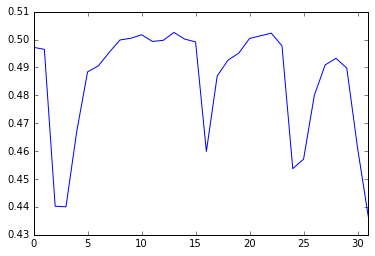

In [8]:
single_bit_means = [df["Bit" + str(i)].mean() for i in range(32)]

pd.Series(single_bit_means).plot()
plt.show()

we see that some bits are quite biased towards 0. And these bits tend to be clumped. bits 2--4 are the most dramatic, but this also happens in bits 16 and 24. Moreover these biases tend to not disappear suddenly but rather to trail off. Bits 2 and 3 are equally biased, then 4 is somewhat biased but even 5, 6 and 7 are noticeably biased. It's as if the number represented by bits 2--7 is drawn from some kind of exponential distribution. Even more strangely, the next bits seem to experience some sort of "compensation", with their average being larger than 0.5 (see bit 9 and 10)

In [9]:
for i in range(32):
    print "bit", i, "average:", single_bit_means[i]

bit 0 average: 0.497200547788
bit 1 average: 0.496461670754
bit 2 average: 0.440236950221
bit 3 average: 0.440033122074
bit 4 average: 0.467129526418
bit 5 average: 0.488404089302
bit 6 average: 0.490569763368
bit 7 average: 0.495372464091
bit 8 average: 0.499824835186
bit 9 average: 0.500449058887
bit 10 average: 0.50170387592
bit 11 average: 0.499308895188
bit 12 average: 0.499691072964
bit 13 average: 0.502538297398
bit 14 average: 0.500130577407
bit 15 average: 0.499149654448
bit 16 average: 0.459868148667
bit 17 average: 0.486913595974
bit 18 average: 0.492582566324
bit 19 average: 0.495117678907
bit 20 average: 0.500378992962
bit 21 average: 0.501315328514
bit 22 average: 0.502283512214
bit 23 average: 0.497754705564
bit 24 average: 0.453708716838
bit 25 average: 0.457103729418
bit 26 average: 0.480066244148
bit 27 average: 0.490881875219
bit 28 average: 0.493251377432
bit 29 average: 0.489741711519
bit 30 average: 0.461097487181
bit 31 average: 0.43637695468


### analysis 3: analyzing just the bits that seem most biased on their own

In [10]:
x = sum([df["Bit" + str(b)] * (2 ** i) for i, b in enumerate([2, 3, 4, 16, 17, 24, 25, 31])])
x.value_counts(normalize=True) / x.value_counts(normalize=True).mean()

13     1.591490
16     1.523004
2      1.516481
0      1.509959
17     1.505067
84     1.496914
18     1.493653
20     1.487130
6      1.480608
22     1.464301
4      1.464301
8      1.457779
21     1.447995
5      1.446365
85     1.433320
12     1.430058
82     1.430058
1      1.410491
54     1.405599
77     1.403968
10     1.403968
72     1.403968
65     1.402338
49     1.402338
34     1.397446
64     1.395815
29     1.394185
38     1.394185
14     1.390923
50     1.387662
         ...   
55     0.549521
71     0.528323
23     0.523431
39     0.513647
251    0.510386
87     0.485926
47     0.481034
95     0.472881
63     0.448422
31     0.443530
135    0.384828
199    0.383197
183    0.383197
167    0.370152
191    0.353846
151    0.350584
103    0.337539
175    0.332648
215    0.329386
127    0.321233
143    0.306558
119    0.304927
159    0.303296
223    0.301666
111    0.301666
247    0.295143
231    0.285359
255    0.285359
239    0.269053
207    0.264161
Length: 256, dtype: floa

conclusion: the nonces with the following pattern:  
**??111???????????11??????11?????1**  
seem to be very rare, with frequency of 28% compared to what we'd expect.

A couple more patterns are even more rare, but I'm guessing this is due to random fluctuations.
